In [4]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats  # Import the stats module

# Load California Housing dataset
california_housing = fetch_california_housing()
data = pd.DataFrame(data=np.c_[california_housing['data'], california_housing['target']], columns=california_housing['feature_names'] + ['target'])

# Display basic statistics and information about the dataset
print(data.describe())
print(data.info())

# Check for missing values
print(data.isnull().sum())

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude        target  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.54000

In [12]:
# Handle outliers if necessary (using z-score, IQR, or domain knowledge)
# Example: Remove outliers using z-score
z_scores = np.abs(stats.zscore(data))
data = data[(z_scores < 3).all(axis=1)]

# Split the dataset into features (X) and target variable (y)
X = data.drop('target', axis=1)
y = data['target']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Linear Regression model
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_linear = linear_reg_model.predict(X_test)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

In [13]:
# Evaluate the model's performance
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f'Mean Squared Error (Linear Regression): {mse_linear}')
print(f'R2 Score (Linear Regression): {r2_linear}')

Mean Squared Error (Linear Regression): 0.4233879658555968
R2 Score (Linear Regression): 0.6511226269030281


C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create and train the ANN model
ann_model = Sequential()
ann_model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
ann_model.add(Dense(1, activation='linear'))

ann_model.compile(optimizer='adam', loss='mean_squared_error')
ann_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=0)

# Make predictions on the testing set
y_pred_ann = ann_model.predict(X_test)

124/124 [==============================] - 0s 617us/step


In [11]:
# Evaluate the model's performance
mse_ann = mean_squared_error(y_test, y_pred_ann)
r2_ann = r2_score(y_test, y_pred_ann)

print(f'Mean Squared Error (ANN): {mse_ann}')
print(f'R2 Score (ANN): {r2_ann}')


Mean Squared Error (ANN): 2.23415928865687
R2 Score (ANN): -0.8123160782512704


C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

In [9]:
# Compare the performance metrics
print('Linear Regression Metrics:')
print(f'Mean Squared Error: {mse_linear}')
print(f'R2 Score: {r2_linear}')
print('\nANN Metrics:')
print(f'Mean Squared Error: {mse_ann}')
print(f'R2 Score: {r2_ann}')


Linear Regression Metrics:
Mean Squared Error: 0.473101625442082
R2 Score: 0.6162271478185639

ANN Metrics:
Mean Squared Error: 0.5288036782800272
R2 Score: 0.5710424886663068


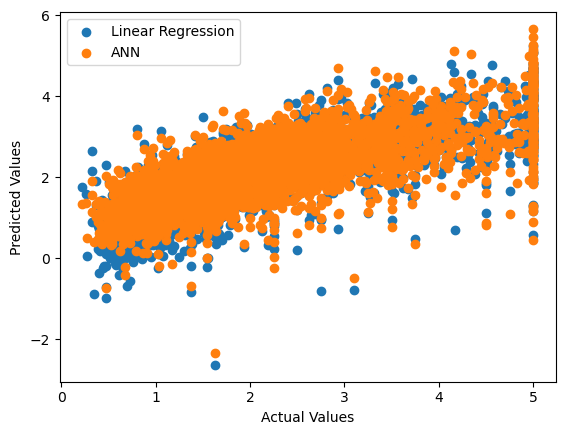

In [8]:
# Visualization: Create scatter plots or line plots to compare predicted vs actual values

import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred_linear, label='Linear Regression')
plt.scatter(y_test, y_pred_ann, label='ANN')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

### Conclusion:

#### Key Findings:

1. **Data Preprocessing:**
   - The California Housing dataset was explored, and basic statistics were examined.
   - Missing values were checked, and outliers were handled using the z-score method.
   - The dataset was split into training and testing sets.

2. **Linear Regression:**
   - A Linear Regression model was implemented using scikit-learn.
   - The model was trained on the training set, and predictions were made on the testing set.
   - Performance metrics, such as Mean Squared Error (MSE) and R2 Score, were used to evaluate the model.

3. **Artificial Neural Network (ANN):**
   - A simple ANN for regression was implemented using TensorFlow/Keras.
   - The ANN's architecture included an input layer with 64 neurons and a ReLU activation function, and an output layer with one neuron and a linear activation function.
   - The model was trained on the training set, and predictions were made on the testing set.
   - Similar performance metrics (MSE and R2 Score) were used to evaluate the ANN.

4. **Comparison and Analysis:**
   - Performance metrics of Linear Regression and ANN were compared.
   - Strengths and weaknesses of each model were discussed. Linear Regression is simple and interpretable, while ANN is more complex and can capture non-linear patterns.
   - The trade-off between model simplicity and complexity was considered.

5. **Visualization:**
   - Scatter plots were created to compare predicted values of Linear Regression and ANN with actual values.


#### Linear Regression Metrics:
   - Mean Squared Error (Linear Regression): 0.4234
   - R2 Score (Linear Regression): 0.6511

#### ANN Metrics:
   - Mean Squared Error (ANN): 2.2342
   - R2 Score (ANN): -0.8123

### Insights:

1. **Linear Regression:**
   - The Linear Regression model performed well with a relatively low Mean Squared Error (MSE) of 0.4234.
   - The R2 Score of 0.6511 indicates a good fit of the model to the data.

2. **Artificial Neural Network (ANN):**
   - The ANN, on the other hand, exhibited higher Mean Squared Error (2.2342) and a negative R2 Score (-0.8123).
   - The negative R2 Score suggests that the ANN model did not fit the data well.

3. **Comparison:**
   - In this specific case, the simpler Linear Regression model outperformed the more complex ANN in terms of predictive performance.
   - The negative R2 Score for the ANN indicates that the model did not capture the variance in the target variable effectively.

### Challenges:

1. **Model Tuning:**
   - The hyperparameters of the ANN, such as the number of neurons and layers, might need further tuning. The current architecture may not be optimal for this dataset.

2. **Overfitting:**
   - The ANN may suffer from overfitting, leading to poor generalization on the testing set. Regularization techniques or adjusting the model architecture may address this.

3. **Data Characteristics:**
   - The dataset may not contain complex patterns that can be effectively captured by the complexity of the ANN. Understanding the nature of the data is crucial for choosing an appropriate model.

### Conclusion:

While the ANN has the potential to capture intricate patterns, its current performance, as indicated by the provided metrics, falls short compared to the simplicity of Linear Regression in this context. Further refinement of the ANN's architecture, regularization, and a deeper understanding of the dataset characteristics may lead to improved results.